#PART - A

In [41]:
inpt=input()
N=int(inpt[0])
arr=[]
for i in inpt[1:].split():
  arr.append(float(i))
print("No. of elements in array", N)
print("N elements of array are", arr)

4 4 6.3 9 -3
No. of elements in array 4
N elements of array are [4.0, 6.3, 9.0, -3.0]


## Goal State

In [42]:
def GOAL(arr):
  for i in range(len(arr)-1):
    if arr[i]<=arr[i+1]:
      continue
    else:
      return False
  return True

## (i) BFS

In [43]:
class Queue:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return len(self.items) == 0

    def enqueue(self, item):
        self.items.append(item)

    def dequeue(self):
        if not self.is_empty():
            return self.items.pop(0)
        else:
            raise IndexError("Dequeue from empty queue")
    def top(self):
        return self.items[0]
    def size(self):
        return len(self.items)


In [44]:
def sort_using_bfs(arr):
  q = Queue()
  q.enqueue(arr)
  path = []
  parent_map = {}
  explored=0
  while len(q.items) != 0 and GOAL(q.items[-1])!=1:
      current_node = q.dequeue()
      explored+=1
      path.append(current_node)
      for i in range(len(current_node) - 1):
          temp = current_node.copy()
          temp[i], temp[i + 1] = temp[i + 1], temp[i]
          if temp not in q.items and temp not in path:
              q.enqueue(temp)
              parent_map[tuple(temp)] = tuple(current_node)

              if GOAL(temp):
                  break
  path.extend(q.items)
  current_state = path[-1]
  final_path = []
  while tuple(current_state) in parent_map:
      parent_state = parent_map[tuple(current_state)]
      index = [i for i in range(len(current_state)) if current_state[i] != parent_state[i]][0]
      final_path.append(tuple(current_state))
      current_state = list(parent_state)
  final_path.append(tuple(arr))
  final_path.reverse()
  return arr, path[-1], list(final_path), explored

start_state, goal_state, path, nodes_explored = sort_using_bfs(arr)
print("Start State", start_state)
print("Goal State", goal_state)
print("Path taken from start state to goal state", path)
print("Number of nodes explored", nodes_explored)


Start State [4.0, 6.3, 9.0, -3.0]
Goal State [-3.0, 4.0, 6.3, 9.0]
Path taken from start state to goal state [(4.0, 6.3, 9.0, -3.0), (4.0, 6.3, -3.0, 9.0), (4.0, -3.0, 6.3, 9.0), (-3.0, 4.0, 6.3, 9.0)]
Number of nodes explored 9


## (ii) DFS

In [45]:
def dfs(visited, parent_map, explored, arr):
    current_node = arr
    explored += 1
    visited.append(arr)
    if GOAL(visited[-1]) == 1:
        return visited, parent_map, explored
    for i in range(len(current_node) - 1):
        temp = current_node.copy()
        temp[i], temp[i + 1] = temp[i + 1], temp[i]
        if temp not in visited:
            parent_map[tuple(temp)] = tuple(current_node)
            visited, parent_map, explored = dfs(visited, parent_map, explored, temp)
            if GOAL(visited[-1]) == 1:
              break
    return visited, parent_map, explored

def sort_using_dfs(arr):
    visited = []
    parent_map = {}
    explored = 0
    visited, parent_map, explored = dfs(visited, parent_map, explored, arr)
    current_state = visited[-1]
    final_path = []
    while tuple(current_state) in parent_map:
        parent_state = parent_map[tuple(current_state)]
        index = [i for i in range(len(current_state)) if current_state[i] != parent_state[i]][0]
        final_path.append(tuple(current_state))
        current_state = list(parent_state)
    final_path.append(tuple(arr))
    final_path.reverse()
    return arr, visited[-1], list(final_path), explored

start_state, goal_state, path, nodes_explored = sort_using_dfs(arr)
print("Start State", start_state)
print("Goal State", goal_state)
print("Path taken from start state to goal state", path)
print("Number of nodes explored", nodes_explored)


Start State [4.0, 6.3, 9.0, -3.0]
Goal State [-3.0, 4.0, 6.3, 9.0]
Path taken from start state to goal state [(4.0, 6.3, 9.0, -3.0), (6.3, 4.0, 9.0, -3.0), (6.3, 9.0, 4.0, -3.0), (9.0, 6.3, 4.0, -3.0), (9.0, 4.0, 6.3, -3.0), (4.0, 9.0, 6.3, -3.0), (4.0, 9.0, -3.0, 6.3), (9.0, 4.0, -3.0, 6.3), (9.0, -3.0, 4.0, 6.3), (-3.0, 9.0, 4.0, 6.3), (-3.0, 4.0, 9.0, 6.3), (4.0, -3.0, 9.0, 6.3), (4.0, -3.0, 6.3, 9.0), (-3.0, 4.0, 6.3, 9.0)]
Number of nodes explored 14


## (iii) Iterative Deepening

In [46]:
def IterativeDeepening(arr):
    depth=1
    explored = 0
    while depth >=0:
        visited = set()
        stack = []

        # initial_path = [arr]

        initial_path = [arr]
        stack.append(initial_path)
        # stack.append(arr)
        visited.add(tuple(arr))

        while stack:
            path= stack.pop()
            current_node = path[-1]
            if GOAL(current_node) == 1:
                return arr, current_node, path, explored, depth

            childs = []
            for i in range(len(arr) - 1):
                updated_list = current_node[:]
                updated_list[i], updated_list[i + 1] = updated_list[i + 1], updated_list[i]
                childs.append(updated_list)
            if(len(path)<depth):
                for child in childs:
                    if tuple(child) not in visited:
                        different_path = path.copy()
                        different_path.append(child)
                        visited.add(tuple(child))
                        stack.append(different_path)
                        explored += 1
        depth+=1

start_state, goal_state, path, nodes_explored, depth= IterativeDeepening(arr)
print("Start State", start_state)
print("Goal State", goal_state)
print("Path taken from start state to goal state", path)
print("Number of nodes explored", nodes_explored)
print("The depth is",depth)

Start State [4.0, 6.3, 9.0, -3.0]
Goal State [-3.0, 4.0, 6.3, 9.0]
Path taken from start state to goal state [[4.0, 6.3, 9.0, -3.0], [4.0, 6.3, -3.0, 9.0], [4.0, -3.0, 6.3, 9.0], [-3.0, 4.0, 6.3, 9.0]]
Number of nodes explored 18
The depth is 4


## (iv) UCS

In [47]:
from queue import PriorityQueue
def sort_using_ucs(arr):
    visited = set()
    pq = PriorityQueue()
    explored = 0
    initial_path = ([arr], 0)
    pq.put(initial_path)
    visited.add(tuple(arr))

    while not pq.empty():
        path, cost = pq.get()
        current_node = path[-1]

        if GOAL(current_node)==1:
            return arr, current_node, path, explored, cost

        for i in range(len(arr) - 1):
            temp = current_node.copy()
            temp[i], temp[i + 1] = temp[i + 1], temp[i]
            if tuple(temp) not in visited:
                different_path = path.copy()
                different_path.append(temp)
                visited.add(tuple(temp))
                pq.put((different_path, cost + 1))
                explored += 1


start_state, goal_state, path, nodes_explored, cost= sort_using_ucs(arr)
print("Start State", start_state)
print("Goal State", goal_state)
print("Path taken from start state to goal state", path)
print("Number of nodes explored", nodes_explored)
print("The cost is",cost)

Start State [4.0, 6.3, 9.0, -3.0]
Goal State [-3.0, 4.0, 6.3, 9.0]
Path taken from start state to goal state [[4.0, 6.3, 9.0, -3.0], [4.0, 6.3, -3.0, 9.0], [4.0, -3.0, 6.3, 9.0], [-3.0, 4.0, 6.3, 9.0]]
Number of nodes explored 7
The cost is 3


## Heuristic function

In [48]:
def heuristic(arr):
    h=0
    for i in range(len(arr)-1):
        if(arr[i]>arr[i+1]):
            h+=1
    return h

## (v) Greedy Search

In [115]:
def sort_using_greedy_search(start_state, heuristic_function):
    visited = []
    priority_queue = []
    priority_queue.append([start_state, heuristic_function(start_state)])
    explored=0
    path = []

    while len(priority_queue)!=0:
        priority_queue.sort(key=lambda x: x[1])  # Sort by heuristic value
        current_state, heuristic_cost = priority_queue[0].copy()
        priority_queue.pop(0)
        explored+=1
        # if tuple(current_state) in visited:
        #     continue

        visited.append(tuple(current_state))

        # if print_state:
        #     print(f'{current_state}, Heuristic: {heuristic_cost}')

        path.append(current_state)

        if GOAL(current_state):
            return arr, current_state, path, explored
        for i in range(len(arr) - 1):
            temp = current_state.copy()
            temp[i], temp[i + 1] = temp[i + 1], temp[i]
            if tuple(temp) not in visited:
              priority_queue.append([temp, heuristic(temp)])


start_state, goal_state, path, nodes_explored = sort_using_greedy_search(arr, heuristic)
print("Start State", start_state)
print("Goal State", goal_state)
print("Path taken from start state to goal state", path)
print("Number of nodes explored", nodes_explored)


Start State [4, 6.3, 9, -3]
Goal State [-3, 4, 6.3, 9]
Path taken from start state to goal state [[4, 6.3, 9, -3], [4, 6.3, -3, 9], [4, -3, 6.3, 9], [-3, 4, 6.3, 9]]
Number of nodes explored 4


## (vi) A* Search

In [113]:
def sort_using_Astar_search(arr):
    visited = []
    pqueue = []
    pqueue.append([arr, 0, heuristic(arr) + 0])
    cost_each=1
    path = []
    explored=0
    while(len(pqueue) != 0):
        front = pqueue[0].copy()
        current_state, cumcost, fcost = front
        pqueue.pop(0)
        explored+=1
        if tuple(current_state) not in visited:
          visited.append(tuple(current_state))

        # if print_state:
        #     print(f'{current_state}, fwd cost + bkwd cost: {fcost}')
        path.append(current_state)

        if GOAL(current_state):
            return arr, current_state, path, explored
        for i in range(len(arr) - 1):
            temp = current_state.copy()
            temp[i], temp[i + 1] = temp[i + 1], temp[i]
            if tuple(temp) not in visited:
              pqueue.append([temp, cumcost+cost_each, heuristic(temp)+cumcost+cost_each])

        pqueue.sort(key=lambda x: x[0])
        pqueue.sort(key=lambda x: x[2])
start_state, goal_state, path, nodes_explored = sort_using_Astar_search(arr)
print("Start State", start_state)
print("Goal State", goal_state)
print("Path taken from start state to goal state", path)
print("Number of nodes explored", nodes_explored)

Start State [4, 6.3, 9, -3]
Goal State [-3, 4, 6.3, 9]
Path taken from start state to goal state [[4, 6.3, 9, -3], [4, 6.3, -3, 9], [4, -3, 6.3, 9], [-3, 4, 6.3, 9]]
Number of nodes explored 4


## (vii) Hill Climbing

In [116]:
def rec_hc(arr, visited, explored):
    if GOAL(arr)==1:
        return arr, explored
    visited.append(tuple(arr))
    children = []
    for i in range(len(arr) - 1):
        temp = arr.copy()
        temp[i], temp[i + 1] = temp[i + 1], temp[i]
        if tuple(temp) not in visited:
          children.append(temp)
    explored+=1
    if len(children) == 0:
        return arr

    compare=0
    bestchild=[]
    for child in children:
      if compare < heuristic(child):
        compare=heuristic(child)
        bestchild=child

    if heuristic(bestchild) < heuristic(arr):
        return arr[::-1], explored

    return rec_hc(bestchild, visited, explored)

def sort_by_hill_climbing(arr):
  visited=[]
  explored=0
  return rec_hc(arr,visited,explored)
start_state=arr
goal_state, nodes_explored=sort_by_hill_climbing(arr)
print("Start State", start_state)
print("Goal State", goal_state)
print("Number of nodes explored", nodes_explored)


Start State [4, 6.3, 9, -3]
Goal State [-3, 4, 6.3, 9]
Number of nodes explored 4


# PART-B

In [53]:
import random
import numpy as np
def generate_random_array(n, min_value=-100, max_value=100):
    return [random.randint(min_value, max_value) for _ in range(n)]


In [84]:
def avg_num_of_nodes_explored_for_each_n(n, arrays):
  print(f"For n = {n}")
  avg=[]

  algo_compare=[]
  for arr in arrays:
    start_state, goal_state, path, nodes_explored = sort_using_bfs(arr)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using bfs : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))

  avg=[]
  for arr in arrays:
    start_state, goal_state, path, nodes_explored = sort_using_dfs(arr)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using dfs : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))

  avg=[]
  for arr in arrays:
    start_state, goal_state, path, nodes_explored, depth= IterativeDeepening(arr)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using iterative deepening : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))

  avg=[]
  for arr in arrays:
    start_state, goal_state, path, nodes_explored, cost = sort_using_ucs(arr)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using ucs : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))

  avg=[]
  for arr in arrays:
    start_state, goal_state, path, nodes_explored = sort_using_greedy_search(arr, heuristic)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using greedy search : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))

  avg=[]
  for arr in arrays:
    start_state, goal_state, path, nodes_explored = sort_using_Astar_search(arr)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using A* search : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))

  avg=[]
  for arr in arrays:
    goal_state, nodes_explored=sort_by_hill_climbing(arr)
    # print(f"For start state {start_state} to goal state {goal_state}, nodes explored : {nodes_explored}")
    avg.append(nodes_explored)
  print(f"Average nodes explored using hill climbing search : {np.mean(avg)}")
  algo_compare.append(np.mean(avg))
  return algo_compare


In [93]:
arrays=[]
for i in range(20):
  random_arr=generate_random_array(3)
  arrays.append(random_arr)
algo_compare3=avg_num_of_nodes_explored_for_each_n(3,arrays)

For n = 3
Average nodes explored using bfs : 2.1
Average nodes explored using dfs : 3.6
Average nodes explored using iterative deepening : 4.5
Average nodes explored using ucs : 2.4
Average nodes explored using greedy search : 2.8
Average nodes explored using A* search : 2.6
Average nodes explored using hill climbing search : 1.6


In [97]:
arrays=[]
for i in range(20):
  random_arr=generate_random_array(4)
  arrays.append(random_arr)
algo_compare4=avg_num_of_nodes_explored_for_each_n(4,arrays)

For n = 4
Average nodes explored using bfs : 8.8
Average nodes explored using dfs : 13.05
Average nodes explored using iterative deepening : 27.75
Average nodes explored using ucs : 7.2
Average nodes explored using greedy search : 4.9
Average nodes explored using A* search : 4.35
Average nodes explored using hill climbing search : 2.7


In [88]:
arrays=[]
for i in range(20):
  random_arr=generate_random_array(5)
  arrays.append(random_arr)
algo_compare5=avg_num_of_nodes_explored_for_each_n(5,arrays)

For n = 5
Average nodes explored using bfs : 40.9
Average nodes explored using dfs : 50.8
Average nodes explored using iterative deepening : 185.8
Average nodes explored using ucs : 14.2
Average nodes explored using greedy search : 9.1
Average nodes explored using A* search : 5.7
Average nodes explored using hill climbing search : 4.0


In [85]:
arrays=[]
for i in range(20):
  random_arr=generate_random_array(6)
  arrays.append(random_arr)
algo_compare6=avg_num_of_nodes_explored_for_each_n(6,arrays)

For n = 6
Average nodes explored using bfs : 241.95
Average nodes explored using dfs : 325.55
Average nodes explored using iterative deepening : 1299.65
Average nodes explored using ucs : 27.75
Average nodes explored using greedy search : 23.9
Average nodes explored using A* search : 8.1
Average nodes explored using hill climbing search : 4.0


## Comparison Graph

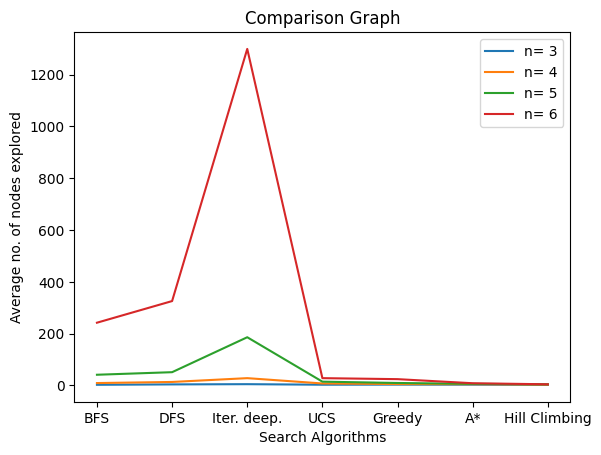

In [104]:
import matplotlib.pyplot as plt
algos=['BFS','DFS','Iter. deep.','UCS','Greedy','A*','Hill Climbing']
# Plotting the lists
plt.plot(algos,algo_compare3, label='n= 3')
plt.plot(algos,algo_compare4, label='n= 4')
plt.plot(algos,algo_compare5, label='n= 5')
plt.plot(algos,algo_compare6, label='n= 6')

# Adding labels and legend
plt.xlabel('Search Algorithms')
plt.ylabel('Average no. of nodes explored')
plt.title('Comparison Graph')
plt.legend()

# Display the plot
plt.show()
